<a href="https://colab.research.google.com/github/ahcamachod/2160-aprendiendo-a-clasificar-datos-con-ml/blob/main/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('/content/marketing_inversiones.csv')

In [ ]:
datos.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


Rango de indices de 1268 (filas)
Con 9 columnas entre elementos int (número entero) y obj (cadena de caracteres o string), sin datos null; lo cual nos facilita la limpieza. Cuando idfentificam,os caracteres null debemos tratarlos

## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

Las variables categóricas, también conocidas como variables cualitativas, son aquellas que representan datos que pueden dividirse en grupos o categorías, en lugar de valores numéricos continuos. Estas categorías no tienen un orden inherente entre sí, a diferencia de las variables ordinales.

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(datos, x='adherencia_inversion', text_auto= True)

In [ ]:
# Vamos a conocer el estado civil

px.histogram(datos, x='estado_civil', text_auto= True, color='adherencia_inversion', barmode='group')

Podemos observar que las proporciones favorecena a las adherencias entre los divorciados y los solteros

In [ ]:
# Vamos a comparar la escolaridad

px.histogram(datos, x='escolaridad', text_auto= True, color='adherencia_inversion', barmode='group')

In [ ]:
# Ahora vamos a comparar con default (no default buena paga

px.histogram(datos, x='default', text_auto= True, color='adherencia_inversion', barmode='group')

In [ ]:
# Vamos a ver si es prestatario

px.histogram(datos, x='prestatario', text_auto= True, color='adherencia_inversion', barmode='group')

Tenemos un análisis del comportamiento contra la variable respuesta que es 'adherencia_inversion'

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


### Variables numéricas

Identificamos las variables numericas:
*   edad
*   saldo
*   ultimo_contacto
*   ct_contactos

In [ ]:
px.box(datos, x='edad', color='adherencia_inversion')

En el eje x podemos ver la edad, empezamoa a encontrar patrones y medidas de tendencia central
*   MEDIANA: 39
*   Q1 SI: 32 Y NO: 33
*   Q3 SI: 50 Y NO: 48
*   LIM INF 19 Y 22
*   LIM SUP 70 Y 78

In [ ]:
px.box(datos, x='saldo', color='adherencia_inversion')

Aqui encontramos muchos outliers
El 25% de las personas que no estan en programa de inversiones tienen menos de $61 USD
El 75% de clientes que si se han añadido a la inversion tiene un saldo menor a los $$2144 USD


In [ ]:
px.box(datos, x='ultimo_contacto', color='adherencia_inversion')

El último contacto esta en días
La mediana de los que no se han añadido fue hace 175 días, y de los que si se añadieron tiene una media de 452 días

Una diferencia notable

In [ ]:
px.box(datos, x='ct_contactos', color='adherencia_inversion')

Vemos un comportamiento similar, de contactos minimos, medios y maximos

Los outliers representan observaciones atipicas

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [ ]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


In [ ]:
X = datos.drop('adherencia_inversion', axis=1)
y = datos['adherencia_inversion']

In [ ]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


Todas las columnas a excepción de adherencia a la inversión

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y

,adherencia_inversion
0,si
1,si
2,no
3,si
4,si
...,...
1263,si
1264,si
1265,si
1266,si


## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

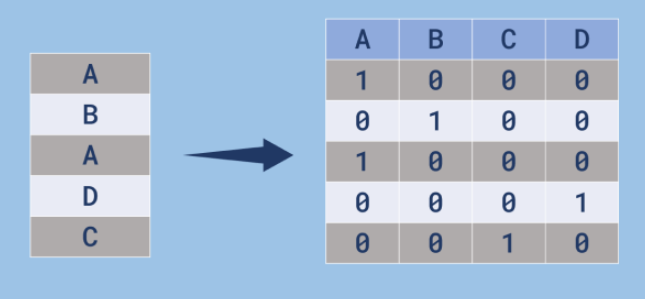

Vamos a utilizar le método de OneHotEncoder

Es una técnica para representar datos categóricos en un formato numérico, donde cada categoría se convierte en una columna binaria con un solo valor de 1 y el resto son 0. Esto evita que los modelos de aprendizaje automático interpreten erróneamente las relaciones ordinales entre categorías, como cuando se usa la codificación de etiquetas, donde se asignan números a las categorías que podrían interpretarse como un orden.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columnas = X.columns

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   ['estado_civil', 'escolaridad', 'prestatario', 'default']),
                                    remainder='passthrough',
                                    sparse_threshold=0,
                                    force_int_remainder_cols=False)

In [ ]:
# Colocamos el modelo en la variable X

X = one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior',
       'onehotencoder__prestatario_si', 'onehotencoder__default_si',
       'remainder__edad', 'remainder__saldo',
       'remainder__ultimo_contacto', 'remainder__ct_contactos'],
      dtype=object)

In [ ]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

Quedo como un array bidimensional, que nuestro modelo será capaza de entender

In [ ]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__prestatario_si,onehotencoder__default_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

# Despues de entrenarlo queremos ver su desempeño

dummy.score(X_test, y_test)

0.6025236593059937

Interpretamos que este modelo Dummy clasifico el 60% de las veces bien, para este caso no es la opción mas adecuada.
Pero es importante conocer todos los modelos

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [ ]:
modelo_arbol.score(X_test, y_test)

0.6593059936908517

Vemos un incremento del 6% respecto al modelo dummy

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [ ]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

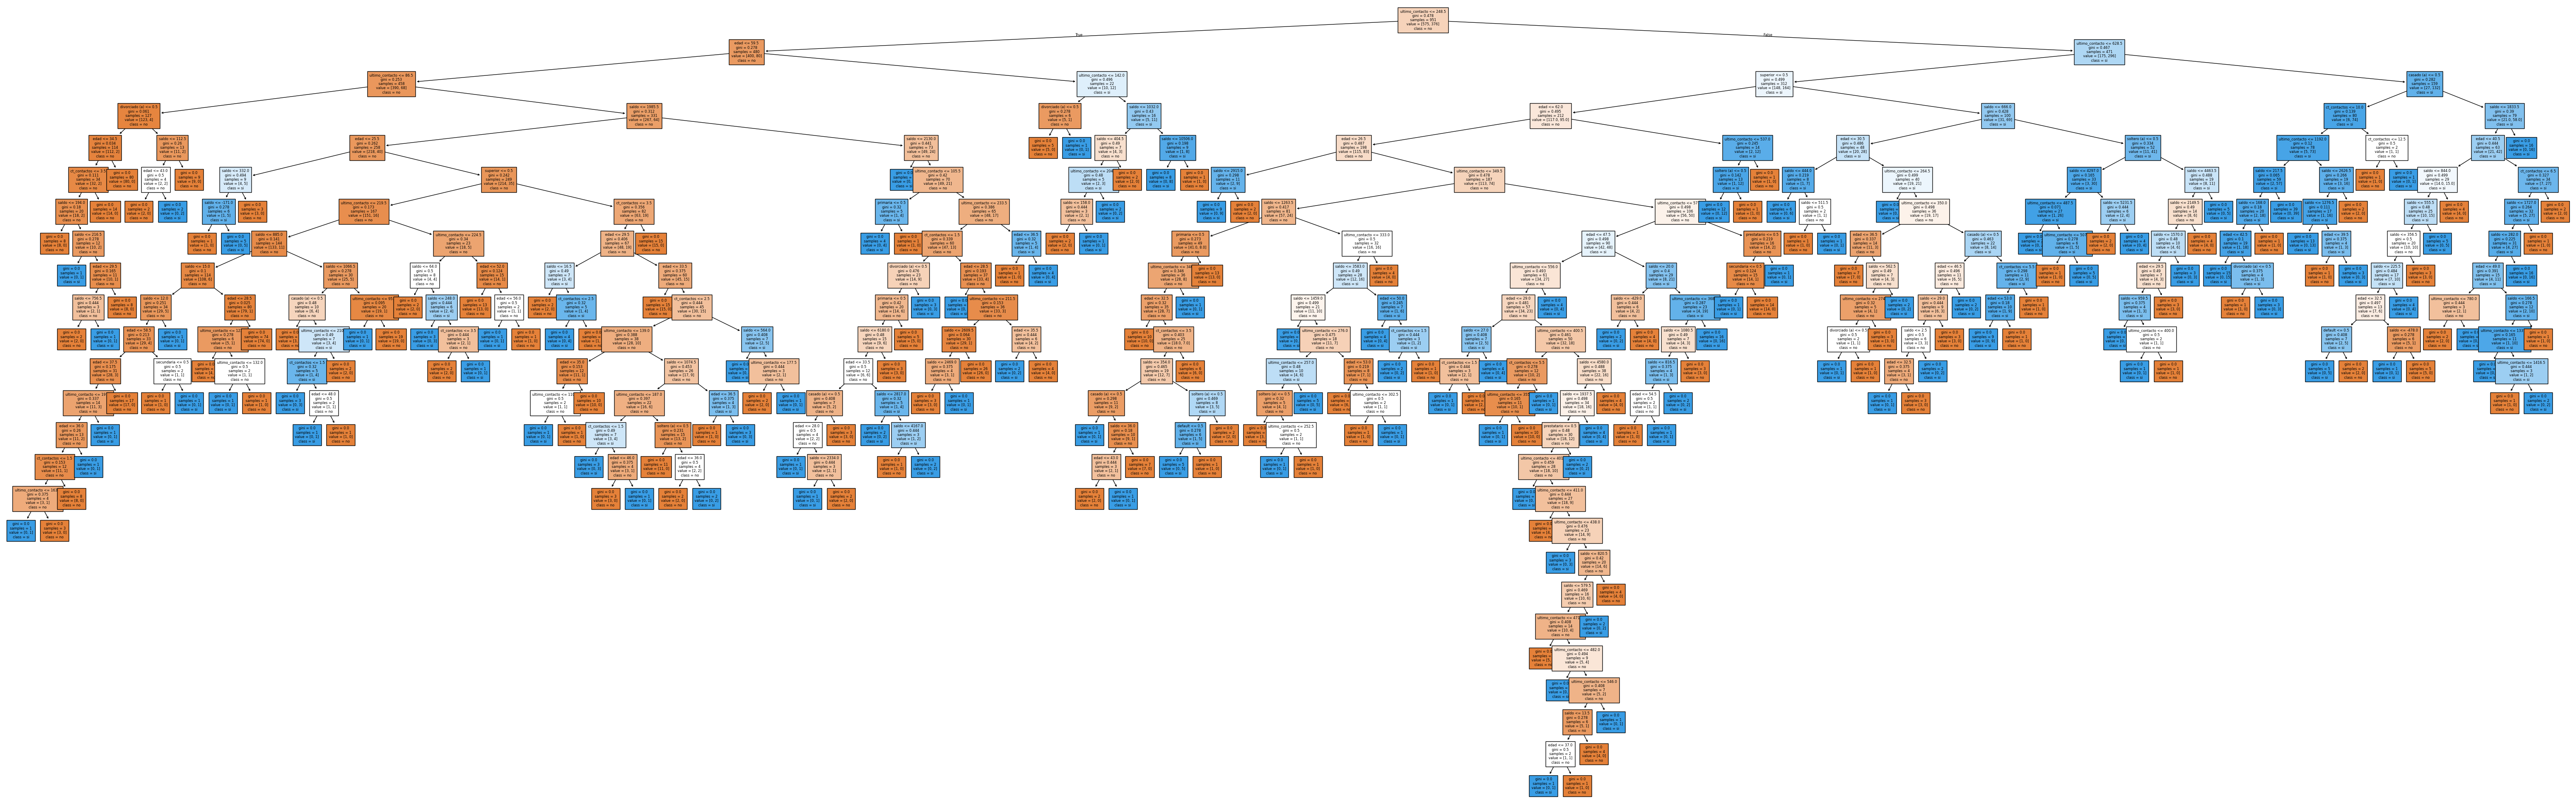

In [ ]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no', 'si'],
          fontsize=6,
          feature_names=valores_columnas);


Nuestro modelo va tomando decisiones de forma iterativa

In [ ]:
modelo_arbol.score(X_train, y_train)

1.0

Nuestro modelo tiene un desempeño de 100% mejorando lo anteriormente visto

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7160883280757098

Nuesto modelo obtuvo un mejor resultado contra los anteriores, en el caso que nos dio 1, se sobreajusto. Ese modelo memorizo, no daría nuevas predicciones

Al limitar la profundidad, garantizamos un modelo que no se sobreajuste

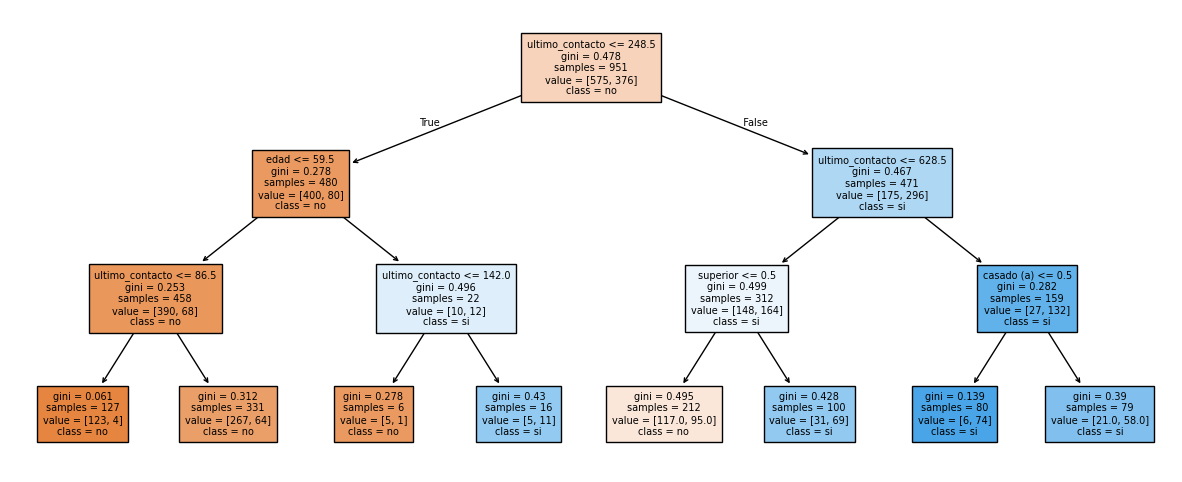

In [169]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no', 'si'],
          fontsize=7,
          feature_names=valores_columnas);

In [170]:
modelo_arbol.score(X_train, y_train)

0.7613038906414301

De esta manera, nuestro modelo aumento al 76%

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)

In [173]:
pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.176471,0.042810,0.023878,0.000000


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizada, y_train)

KNeighborsClassifier()

In [176]:
X_test_normalizada = normalizacion.transform(X_test)

In [177]:
knn.score(X_test_normalizada, y_test)

0.6876971608832808

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [178]:
lista = [('dummy', dummy, X_test), ('arbol', modelo_arbol, X_test), ('knn', knn, X_test_normalizada)]
for i in lista:
    print(f'La exactiud del modelo {i[0]}: {i[1].score(i[2], y_test)}')

La exactiud del modelo dummy: 0.6025236593059937
La exactiud del modelo arbol: 0.7160883280757098
La exactiud del modelo knn: 0.6876971608832808


In [179]:
import pickle

In [180]:
# Nos permite crear archivos binarios para contener el modelo de ML serializado listo para usar

with open('modelo_onehotencoder.pickle', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [182]:
# Hacemos lo mismo para nuestro modelo de arbol

with open('modelo_champion.pickle', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [183]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [184]:
nuevo_dato = pd.DataFrame(nuevo_dato)

In [185]:
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


### Vamos a usar nuestros modelos

In [186]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pickle')
modelo_arbol = pd.read_pickle('/content/modelo_champion.pickle')

In [187]:
modelo_arbol.predict(nuevo_dato)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



ValueError: could not convert string to float: 'soltero (a)'

Debemos transformar primero los datos parta despues usar el modelo
**Codificar para predecir**

In [188]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([1])

### Resultado

Nuestro cliente tiene alta posibilidad de añadirse al plan de inversiones